In [1]:
import nltk                        
import os
import requests
import pandas as pd                 
from nltk.corpus import twitter_samples 
import matplotlib.pyplot as plt   
import numpy as np                 
from utils import process_tweets, build_freqs

In [2]:
pos_tweets = twitter_samples.strings("positive_tweets.json")
neg_tweets = twitter_samples.strings("negative_tweets.json")

In [3]:
all_tweets = pos_tweets+neg_tweets
labels = np.append(np.ones((len(pos_tweets))),np.zeros((len(neg_tweets))))

In [4]:
train_pos = pos_tweets[:4000]
train_neg = neg_tweets[:4000]
train = train_pos + train_neg

In [5]:
data=pd.read_csv("logistic_features.csv")
data.head(10)

,bias,positive,negative,sentiment
0,1.0,3020.0,61.0,1.0
1,1.0,3573.0,444.0,1.0
2,1.0,3005.0,115.0,1.0
3,1.0,2862.0,4.0,1.0
4,1.0,3119.0,225.0,1.0
5,1.0,2955.0,119.0,1.0
6,1.0,3934.0,538.0,1.0
7,1.0,3162.0,276.0,1.0
8,1.0,628.0,189.0,1.0
9,1.0,264.0,112.0,1.0


In [6]:
X = data[['bias', 'positive', 'negative']].values
Y = data["sentiment"].values

In [7]:
X.shape,Y.shape

((8000, 3), (8000,))

In [8]:
#pretrained weights and bias
theta = [7e-08, 0.0005239, -0.00055517]

Text(0, 0.5, 'Negative')

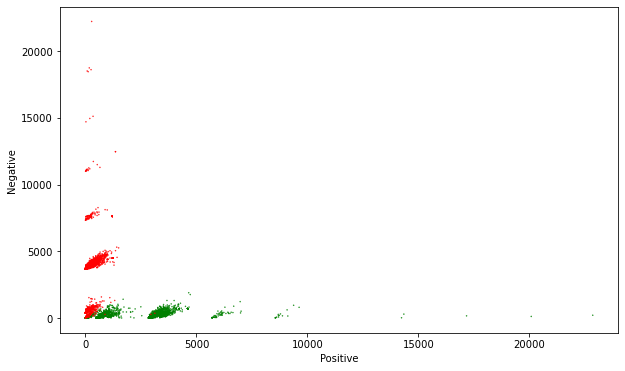

In [9]:
fig, ax = plt.subplots(figsize = (10,6))
colors = ['red', 'green']
ax.scatter(X[:,1],X[:,2],c=[colors[int(k)] for k in Y],s=0.2)
plt.xlabel("Positive")
plt.ylabel("Negative")

In [10]:
#w0+w1*pos+w2*neg=0
#neg=(-w0-w1*p)/w2
def neg(theta, pos):
    return (-theta[0] - pos * theta[1]) / theta[2]
def direction(theta, pos):
    return pos * theta[2] / theta[1]

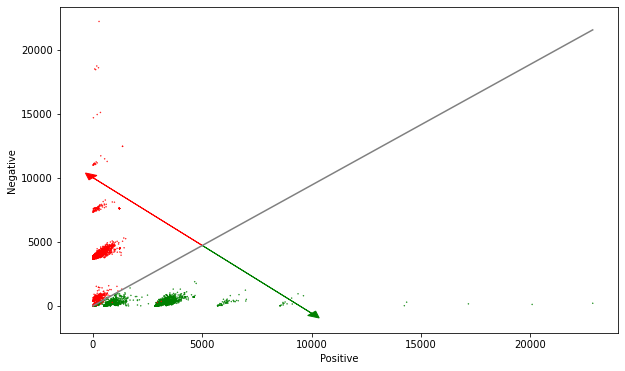

In [11]:
fig, ax = plt.subplots(figsize = (10,6))
colors = ['red', 'green']
ax.scatter(X[:,1],X[:,2],c=[colors[int(k)] for k in Y],s=0.2)
plt.xlabel("Positive")
plt.ylabel("Negative")
maxpos = np.max(X[:,1])
offset = 5000
ax.plot([0,  maxpos], [neg(theta, 0),   neg(theta, maxpos)], color = 'gray') 
ax.arrow(offset, neg(theta, offset), offset, direction(theta, offset), head_width=500, head_length=500, fc='g', ec='g')
ax.arrow(offset, neg(theta, offset), -offset, -direction(theta, offset), head_width=500, head_length=500, fc='r', ec='r')
plt.show()